## **Análise Exploratória de Ativos**

Elaborado por: Carol Ribeiro
dscarolribeiro@gmail.com

In [1]:
# To install yfinance before you use it.
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
ticker = yf.Ticker("JBSS3.SA")

# get stock info
print(ticker.info)

# get historical market data
df = pd.DataFrame(ticker.history(period='max'))

{'zip': '05118-100', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 242000, 'longBusinessSummary': "JBS S.A., a food company, processes and trades in animal protein worldwide. It offers beef, pork, chicken, and lamb products and by-products; food products; pet food and concentrates; and bresaola. The company also produces and commercializes steel cans, plastic resins, soap bases and bars, biodiesel, glycerin, fatty acid, collagen, and wrapper, as well as wet blue, semi-finished, and finished leather products; manages industrial residue; purchases and sells soybeans; and produces, cogenerates, and commercializes electric power. In addition, it is involved in tallow, palm oil, caustic soda, stearin, transportation, dog biscuits, hygiene and personal care, and sausage casings business; the operation of distribution centers and harbors; and the provision of cattle fattening, transportation, logistics, warehousing, and waste management and recycling services. Further, the company trad

In [5]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-03-29,6.83,6.83,5.99,6.07,33864225,0.0,0
2007-03-30,6.07,6.67,5.60,6.43,13917019,0.0,0
2007-04-02,6.42,6.55,6.29,6.31,4416017,0.0,0
2007-04-03,6.45,6.59,6.29,6.50,1659497,0.0,0
2007-04-04,6.47,6.59,6.40,6.43,1744316,0.0,0
2007-04-05,6.43,6.49,6.39,6.49,529547,0.0,0
2007-04-09,6.43,6.59,6.43,6.49,943848,0.0,0
2007-04-10,6.49,6.50,6.43,6.43,781400,0.0,0
2007-04-11,6.36,6.47,6.24,6.37,1991376,0.0,0


In [6]:
# Verificando o tamanho do df
df.shape

(3312, 7)

In [7]:
# Removendo as colunas que não são de interesse.
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [8]:
# Confirmando a leitura do dataset
df

,Open,High,Low,Close,Volume
Date,,,,,
2007-03-29,6.83,6.83,5.99,6.07,33864225
2007-03-30,6.07,6.67,5.60,6.43,13917019
2007-04-02,6.42,6.55,6.29,6.31,4416017
2007-04-03,6.45,6.59,6.29,6.50,1659497
2007-04-04,6.47,6.59,6.40,6.43,1744316
...,...,...,...,...,...
2020-08-25,24.70,24.76,23.54,23.78,18796900
2020-08-26,23.91,23.94,22.94,23.35,21186900
2020-08-27,23.59,23.73,23.00,23.10,11957000


In [9]:
# Criando novas colunas (PriceDiff, Range, DailyReturn)
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
df['Range'] = df['High'] - df['Low']
df['Return'] = round(((df['PriceDiff'] /df['Close']) * 100), 2)

In [10]:
df.head()

,Open,High,Low,Close,Volume,PriceDiff,Range,Return
Date,,,,,,,,
2007-03-29,6.83,6.83,5.99,6.07,33864225,0.36,0.84,5.93
2007-03-30,6.07,6.67,5.60,6.43,13917019,-0.12,1.07,-1.87
2007-04-02,6.42,6.55,6.29,6.31,4416017,0.19,0.26,3.01
2007-04-03,6.45,6.59,6.29,6.50,1659497,-0.07,0.30,-1.08
2007-04-04,6.47,6.59,6.40,6.43,1744316,0.06,0.19,0.93


In [11]:
# Criando uma nova coluna Direção.
# The List Comprehension means : if the price difference is larger than 0, denote as 1, otherwise, denote as 0, for every record in the DataFrame

df['Direction'] = [1 if df['PriceDiff'].loc[ei] > 0 else 0 for ei in df.index ]

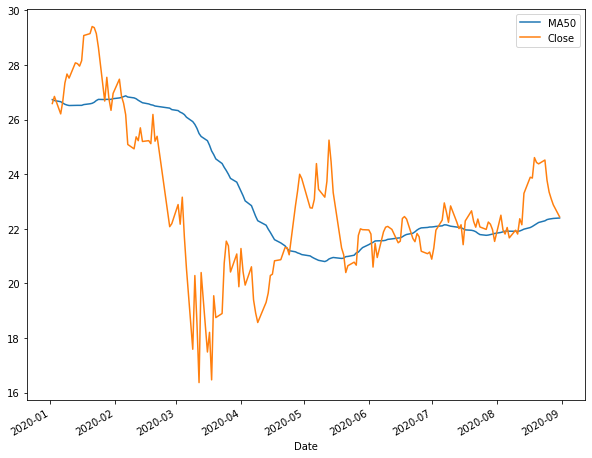

In [12]:
#Criando uma nova coluna no df usando o cálculo Rolling Window (.rolling()) - Média Móvel
df['MA50'] = df['Close'].rolling(50).mean()

# Plotando a média móvel
plt.figure(figsize=(10, 8))
df['MA50'].loc['2020-01-01':'2020-12-31'].plot(label='MA50')
df['Close'].loc['2020-01-01':'2020-12-31'].plot(label='Close')
plt.legend()
plt.show()

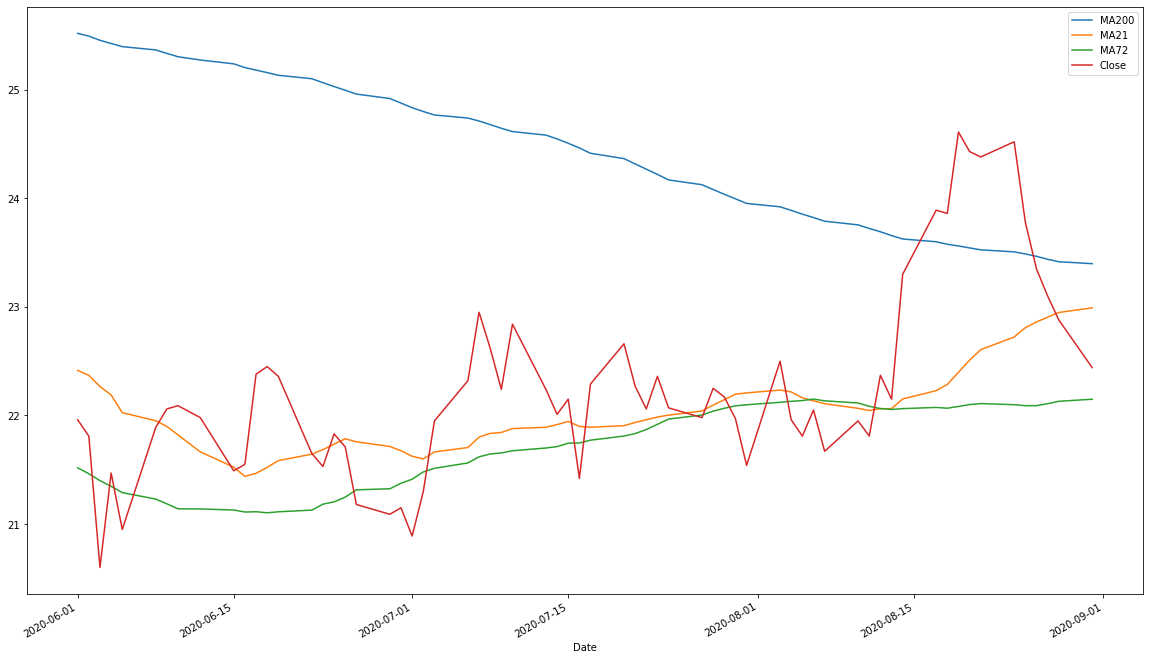

In [13]:
# Análise Trimestral: Jun, Jul, Agosto
df['MA21'] = df['Close'].rolling(21).mean()
df['MA72'] = df['Close'].rolling(72).mean()
df['MA200'] = df['Close'].rolling(200).mean()

# Plotando a média móvel
plt.figure(figsize=(20, 12))
df['MA200'].loc['2020-06-01':'2020-12-31'].plot(label='MA200')
df['MA21'].loc['2020-06-01':'2020-12-31'].plot(label='MA21')
df['MA72'].loc['2020-06-01':'2020-12-31'].plot(label='MA72')
df['Close'].loc['2020-06-01':'2020-12-31'].plot(label='Close')
plt.legend()
plt.show()

# **Outros** **ativos**

In [15]:
jbs = df.copy()
jbs.head()

,Open,High,Low,Close,Volume,PriceDiff,Range,Return,Direction,MA50,MA21,MA72,MA200
Date,,,,,,,,,,,,,
2007-03-29,6.83,6.83,5.99,6.07,33864225,0.36,0.84,5.93,1,NaN,NaN,NaN,NaN
2007-03-30,6.07,6.67,5.60,6.43,13917019,-0.12,1.07,-1.87,0,NaN,NaN,NaN,NaN
2007-04-02,6.42,6.55,6.29,6.31,4416017,0.19,0.26,3.01,1,NaN,NaN,NaN,NaN
2007-04-03,6.45,6.59,6.29,6.50,1659497,-0.07,0.30,-1.08,0,NaN,NaN,NaN,NaN
2007-04-04,6.47,6.59,6.40,6.43,1744316,0.06,0.19,0.93,1,NaN,NaN,NaN,NaN


In [16]:
# Importando dados dos outros ativos do setor
ticker = yf.Ticker("MRFG3.SA")
# get stock info
print(ticker.info)
# get historical market data
marfrig = pd.DataFrame(ticker.history(period='max'))

{'zip': '05319-000', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 32222, 'longBusinessSummary': 'Marfrig Global Foods S.A. operates in the food and food service industries in Brazil and internationally. The company is involved in the production, processing, distribution, and sale of animal-based proteins, such as beef, lamb, and fish, as well as plant-based proteins; and various other food products, including frozen vegetables, sauces, and desserts. It also engages in energy trading and associated services business. The company sells and exports its products to restaurant and supermarket chains, and homes in approximately 100 countries. The company was formerly known as Marfrig Alimentos S.A. and changed its name to Marfrig Global Foods S.A. in January 2014. Marfrig Global Foods S.A. was founded in 1986 and is headquartered in SÃ£o Paulo, Brazil.', 'city': 'SÃ£o Paulo', 'phone': '55 11 3792 8600', 'state': 'SP', 'country': 'Brazil', 'companyOfficers': [], 'website': 'http://www

In [17]:
marfrig.shape

(3249, 7)

In [18]:
marfrig.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
marfrig.head()

In [20]:
#Create a new column PriceDiff in the DataFrame 
marfrig['PriceDiff'] = marfrig['Close'].shift(-1) - marfrig['Close']
#Create a new column Range in the DataFrame 
marfrig['Range'] = marfrig['High'] - marfrig['Low']
#Create a new column Daily Return in the DataFrame fb
marfrig['Return'] = round(((marfrig['PriceDiff'] /marfrig['Close']) * 100), 2)
marfrig.head()

,Open,High,Low,Close,Volume,PriceDiff,Range,Return
Date,,,,,,,,
2007-06-29,16.99,18.34,16.99,17.94,4393400,1.30,1.35,7.25
2007-07-02,18.23,19.91,17.75,19.24,1598000,-0.45,2.16,-2.34
2007-07-03,19.48,19.49,18.28,18.79,680600,-0.43,1.21,-2.29
2007-07-04,18.45,18.93,18.36,18.36,251100,0.78,0.57,4.25
2007-07-05,18.44,19.24,18.44,19.14,1104300,0.74,0.80,3.87


In [21]:
# Importando dados dos outros ativos do setor
ticker = yf.Ticker("BEEF3.SA")
# get stock info
print(ticker.info)
# get historical market data
minerva = pd.DataFrame(ticker.history(period='max'))

{'zip': '14781-545', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 18000, 'longBusinessSummary': "Minerva S.A. engages in the production and sale of fresh beef, livestock, and by-products in Brazil. It is also involved in slaughtering and deboning, and processing of cattle, meat, beef, and sheep meat; selling chilled, frozen, and processed meat, as well as beef, pork, and poultry products; exporting and selling live cattle; and breeding and selling live cattle, lambs, pigs, and other live animals. In addition, the company trades in and sells electric power; trades in food products; sells third parties' brands primarily Swift products; and prepares products for animals, which include meat/bone meal, blood, and tallow. As of December 31, 2019, it operates 24 slaughter and deboning plants, and 3 processing plants in Brazil, Paraguay, Argentina, Uruguay, and Colombia. The company was founded in 1957 and is headquartered in Barretos, Brazil.", 'city': 'Barretos', 'phone': '55 17 3321

In [22]:
jbs.shape, marfrig.shape, minerva.shape 

((3312, 13), (3249, 8), (3242, 7))

In [23]:
minerva.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
#Create a new column PriceDiff in the DataFrame 
minerva['PriceDiff'] = minerva['Close'].shift(-1) - minerva['Close']
#Create a new column Range in the DataFrame 
minerva['Range'] = minerva['High'] - minerva['Low']
#Create a new column Daily Return in the DataFrame fb
minerva['Return'] = round(((minerva['PriceDiff'] /minerva['Close']) * 100), 2)
minerva.head()

,Open,High,Low,Close,Volume,PriceDiff,Range,Return
Date,,,,,,,,
2007-07-20,17.87,18.00,17.41,17.69,7911259,-0.19,0.59,-1.07
2007-07-23,17.86,18.39,17.22,17.50,906137,-0.33,1.17,-1.89
2007-07-24,17.41,17.69,17.17,17.17,928104,0.24,0.52,1.40
2007-07-25,17.22,17.69,17.13,17.41,1502500,-0.38,0.56,-2.18
2007-07-26,17.10,17.21,16.66,17.03,1411174,0.61,0.55,3.58


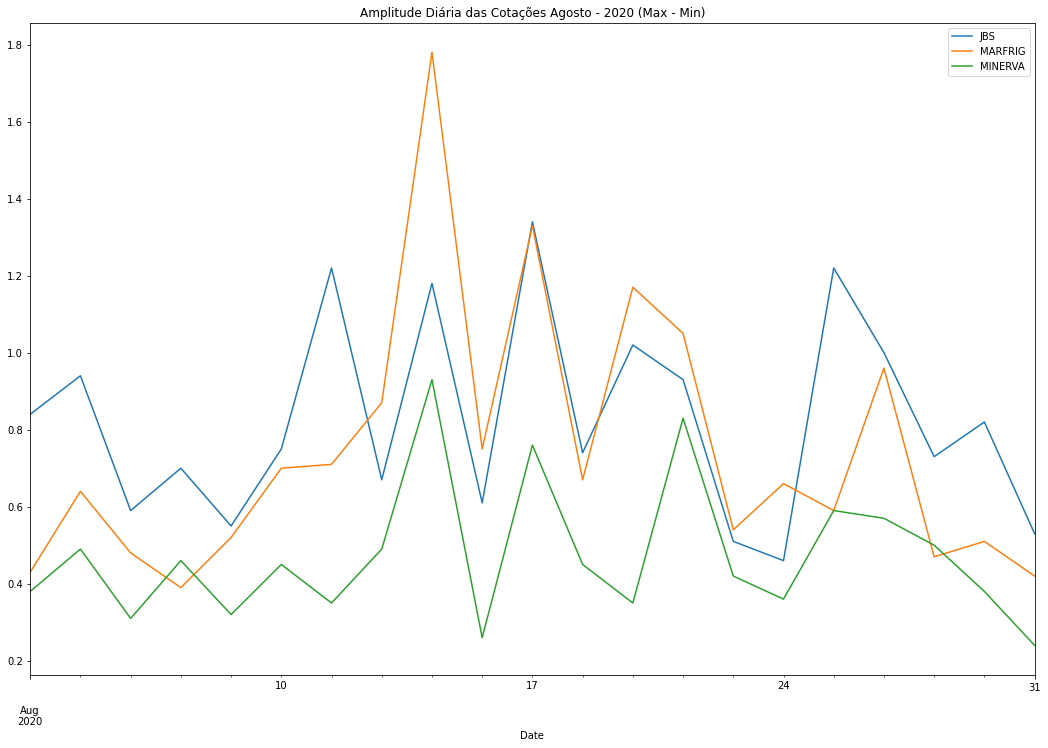

In [28]:
#plot the range
plt.figure(figsize=(18, 12))
jbs['Range'].loc['2020-08-01':'2020-12-31'].plot(label='JBS')
marfrig['Range'].loc['2020-08-01':'2020-12-31'].plot(label='MARFRIG')
minerva['Range'].loc['2020-08-01':'2020-12-31'].plot(label='MINERVA')
plt.title("Amplitude Diária das Cotações Agosto - 2020 (Max - Min)")
plt.legend()
plt.show()

R^2 = 48 is already high enough for noisy data like stock market.

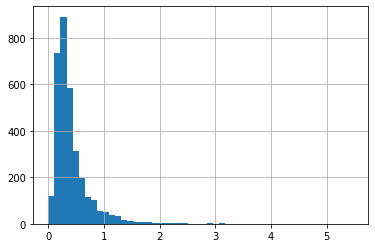

In [45]:
jbs['Range'].hist(bins=50)

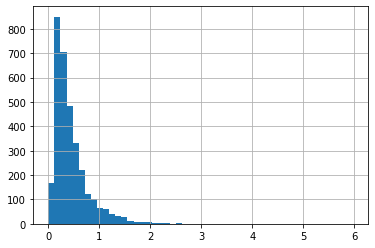

In [46]:
marfrig['Range'].hist(bins=50)